<a href="https://colab.research.google.com/github/COMS-BC3159-SP24/colabs/blob/main/TaylorExpansionsForDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Nonlinear) Gradient Descent
Given we can calculate the gradient of our cost function, we can minimize it by moving in the opposite direction of the gradient using some learning rate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

First lets generate a nonlinear function (and it's derivative)! And lets pick a starting point of `(2.5,-61.875)`

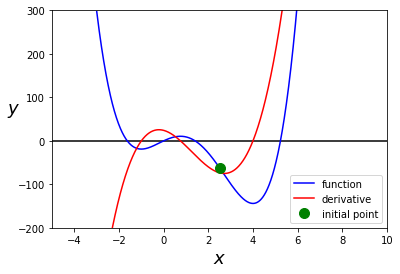

In [ ]:
def myFunc(x):
  return 2*np.power(x,4) - 10*np.power(x,3) - 7*np.power(x,2) + 24*x
def myFuncPrime(x):
  return 8*np.power(x,3) - 30*np.power(x,2) - 14*x + 24
N = 1000
X = np.linspace(-3, 7, num=N)
y = myFunc(X)
y_prime = myFuncPrime(X)
plt.plot(np.linspace(-5, 10, num=N),np.zeros(X.size),'k')
plt.plot(X,y,'b-',label='function')
plt.plot(X,y_prime,'r-', label='derivative')
plt.plot([2.5],[-61.875],'g.', markersize=20, label="initial point")
plt.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([-5,10,-200,300])

We can see that our starting point needs to go downhill to get to the local minima as the derivative is negative (which should indicate left) BUT for gradient DESCENT we move in the OPPOSITE direction of the gradient!

Now in this case we can compute the gradient/derivative exactly easily BUT lets assume our function is ugly and gross -- lets use a taylor expansion (note the below is the expansion about the point `w` for any input `x`)
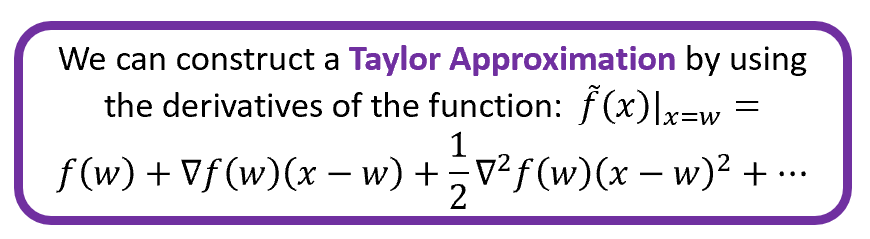

In [ ]:
def myFuncDPrime(x):
  return 23*np.power(x,2) - 60*x - 14
def myFuncTaylor(x,w):
  delta = (x-w)
  return myFunc(w) + myFuncPrime(w)*delta + 0.5*myFuncDPrime(x)*np.power(delta,2)
def myFuncTaylorPrime(x,w):
  delta = (x-w)
  return myFuncPrime(w) + myFuncPrime(w)*delta

Note that I also compute the gradient of the Taylor expansion -- lets add both to the plot around our point (and Zoom in)!

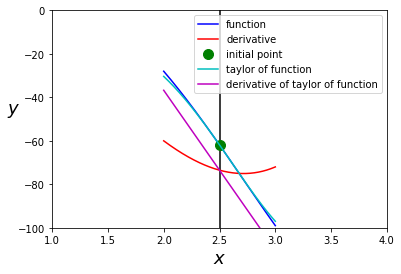

In [ ]:
N = 1000
X = np.linspace(2, 3, num=N)
y = myFunc(X)
y_prime = myFuncPrime(X)
y_taylor = myFuncTaylor(X,2.5)
y_taylorPrime = myFuncTaylorPrime(X,2.5)
plt.plot(2.5*np.ones(X.size),np.linspace(-100, 0, num=N),'k')
plt.plot(X,y,'b-',label='function')
plt.plot(X,y_prime,'r-', label='derivative')
plt.plot([2.5],[-61.875],'g.', markersize=20, label="initial point")
plt.plot(X,y_taylor,'c-',label='taylor of function')
plt.plot(X,y_taylorPrime,'m-',label='derivative of taylor of function')
plt.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([1,4,-100,0])

You can see that we've introduced some error BUT around the actual point itself the error is pretty low!

Let's compute the gradient descent update based on both the actual and estimated function!

In [ ]:
alpha = 0.001
current_x = 2.5
update_reg = alpha*myFuncPrime(current_x)
update_taylor = alpha*myFuncTaylorPrime(current_x,2.5)
print(update_reg,update_taylor)

-0.0735 -0.0735


Hey they are the same! Lets take that step and compute another update based on the funciton and that same approximation!

In [ ]:
current_x -= update_reg
update_reg = alpha*myFuncPrime(current_x)
update_taylor = alpha*myFuncTaylorPrime(current_x,2.5)
print(update_reg,update_taylor)

-0.07436375597700001 -0.07890225000000001


And now you see that we are introducing error. Why is that? Well we're using gradient values away from that point where they are equal!

That said, if we keep recomputing the taylor expansion we will remain accurate! (But that can be computationally intensive)